In [1]:
# !pip install pytrends
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrend   

plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

Setup the query terms and conditions

Keywords to be used:
* Bitcoin (BTC) 
* Ethereum (ETH) 
* Tether (USDT) 
* Binance Coin (BNB)
* USD Coin (USDC) 
* Solana (SOL)
* XRP (XRP)
* Terra (LUNA)
* Cardano (ADA)
* Avalanche (AVAX)
* Polkadot (DOT)
* Dogecoin (DOGE)

In [2]:
#Trying out just bitcoin to start
pytrend = TrendReq(hl='en-US')
keyword = 'bitcoin'
start = '2017-01-01'
end = '2021-11-23'
geo='US'
cat=0
gprop=''
requests_args={'verify':False}

In [3]:
single_names = ["bitcoin","ethereum","tether","binance coin", "usd coin"]

In [4]:
# For the loop for different coins

# dicti = {}
# for keyword in single_names:
#     try:
#         pytrends.build_payload(kw_list=keyword,
#                               timeframe = DATE_INTERVAL,
#                               cat=CATEGORY,
#                               gprop='')
#         dicti[keyword] =pytrends.interest_over_time()
#         time.sleep(6)
#     except requests.exceptions.Timeout:
#         print('Timeout occured')
#         df_trends = pd.concat(dicti,axis=1)
#         df_trends.head()

In [5]:
dicti = {}
for keyword in single_names:
    dicti[keyword] = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0).iloc[:,0]

Fetching 'bitcoin' for period:2021-02-27 2021-11-23
Fetching 'bitcoin' for period:2020-09-11 2021-06-07
Normalize by overlapping period:2021-02-27 2021-06-07
Fetching 'bitcoin' for period:2020-03-26 2020-12-20
Normalize by overlapping period:2020-09-11 2020-12-20
Fetching 'bitcoin' for period:2019-10-09 2020-07-04
Normalize by overlapping period:2020-03-26 2020-07-04
Fetching 'bitcoin' for period:2019-04-23 2020-01-17
Normalize by overlapping period:2019-10-09 2020-01-17
Fetching 'bitcoin' for period:2018-11-05 2019-08-01
Normalize by overlapping period:2019-04-23 2019-08-01
Fetching 'bitcoin' for period:2018-05-20 2019-02-13
Normalize by overlapping period:2018-11-05 2019-02-13
Fetching 'bitcoin' for period:2017-12-02 2018-08-28
Normalize by overlapping period:2018-05-20 2018-08-28
Fetching 'bitcoin' for period:2017-06-16 2018-03-12
Normalize by overlapping period:2017-12-02 2018-03-12
Fetching 'bitcoin' for period:2016-12-29 2017-09-24
Normalize by overlapping period:2017-06-16 2017-

KeyError: "['isPartial'] not found in axis"

Acquire daily google trend data for over 9 month by concatenating multiple queries, and normalize(scaling) by the overlapping period (overlapping method)

1) collect all of the daily SVI data you need in 90 day increments and combine them into a single increment covering the entire time period of interest. 

2) line up the data for the same entire time period, but aggregated at a weekly level to get the weekly SVI. Determine an adjustment factor which is done by dividing the weekly SVI with the daily SVI value where the dates overlap. 

3) multiple the daily SVI values by the adjustment factor14. In cases when the SVI was less than 1, the value was returned by the Google Trends query as < 1. To allow for an adjustment calculation we changed that value to 0.5. Google does not provide any more information on what the specific value was, so the halfway value of 0.5 was used as a substitute. As we did when collecting tweets, we elected to collect Google Trends data using the least ambiguous terms as possible which were ”bitcoin” and ”ethereum”. Each currency’s abbreviation, ”BTC” and ”ETH” respectively were not used.


In [6]:
overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)

Fetching 'binance coin' for period:2021-02-27 2021-11-23
Fetching 'binance coin' for period:2020-09-11 2021-06-07
Normalize by overlapping period:2021-02-27 2021-06-07
Fetching 'binance coin' for period:2020-03-26 2020-12-20
Normalize by overlapping period:2020-09-11 2020-12-20
Fetching 'binance coin' for period:2019-10-09 2020-07-04
Normalize by overlapping period:2020-03-26 2020-07-04
Fetching 'binance coin' for period:2019-04-23 2020-01-17
Normalize by overlapping period:2019-10-09 2020-01-17
Fetching 'binance coin' for period:2018-11-05 2019-08-01
Normalize by overlapping period:2019-04-23 2019-08-01
Fetching 'binance coin' for period:2018-05-20 2019-02-13
Normalize by overlapping period:2018-11-05 2019-02-13
Fetching 'binance coin' for period:2017-12-02 2018-08-28
Normalize by overlapping period:2018-05-20 2018-08-28
Fetching 'binance coin' for period:2017-06-16 2018-03-12
Normalize by overlapping period:2017-12-02 2018-03-12
Fetching 'binance coin' for period:2016-12-29 2017-09-2

KeyError: "['isPartial'] not found in axis"

In [7]:
data = pd.DataFrame()
for keyword in dicti.keys():
    data[keyword] = dicti[keyword]

<AxesSubplot:xlabel='date'>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


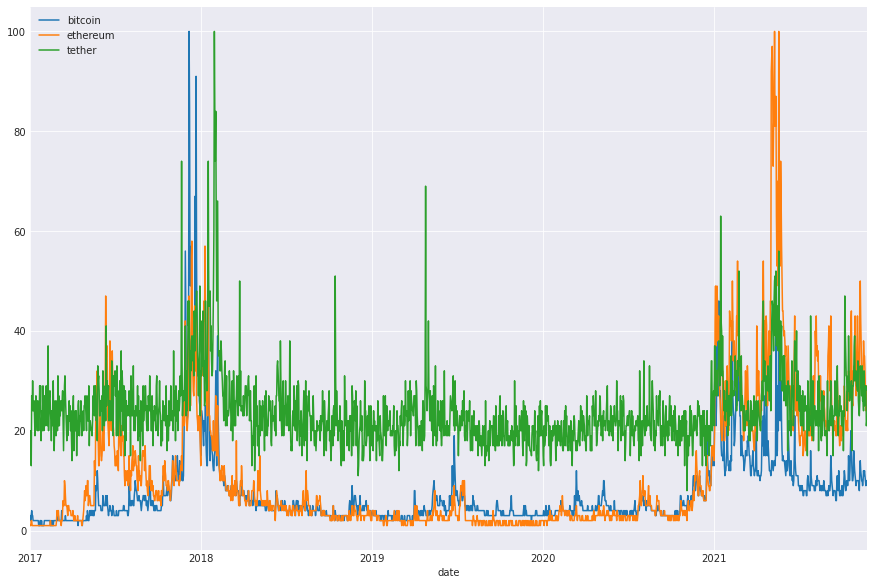

In [8]:
data.plot(figsize = (15,10))

In [9]:
data.corr()

,bitcoin,ethereum,tether
bitcoin,1.000000,0.670330,0.533102
ethereum,0.670330,1.000000,0.519128
tether,0.533102,0.519128,1.000000


In [10]:
import scipy.stats as stats

stats.pearsonr(data["bitcoin"],data["ethereum"])

(0.6703295681873987, 1.140583989475116e-233)

Acquire daily google trend data for over 9 month by concatenating multiple non-overlapping queries of 1-month, and normalize(scaling) by weekly trend value of the same period. (pytrends dailydata.py method)

In [11]:
data

,bitcoin,ethereum,tether
date,,,
2017-01-01,2.0,1.0,20.0
2017-01-02,3.0,1.0,17.0
2017-01-03,2.0,1.0,20.0
2017-01-04,3.0,2.0,13.0
2017-01-05,4.0,2.0,27.0
...,...,...,...
2021-11-19,11.0,32.0,29.0
2021-11-20,10.0,28.0,28.0
2021-11-21,9.0,24.0,29.0


In [13]:
import yfinance as yf

ticker = yf.Ticker("BTC-USD")
print(ticker)
# ticker.info
btc = ticker.history(start=start, end=end)

yfinance.Ticker object <BTC-USD>


In [14]:
ticker = yf.Ticker("ETH-USD")
print(ticker)
# ticker.info
eth = ticker.history(start=start, end=end)

yfinance.Ticker object <ETH-USD>


In [15]:
ticker = yf.Ticker("USDT-USD")
print(ticker)
# ticker.info
teth = ticker.history(start=start, end=end)

yfinance.Ticker object <USDT-USD>


In [16]:
btc.columns= ['Open', 'High', 'Low', 'bitcoin_Close', 'Volume', 'Dividends', 'Stock Splits']
eth.columns = ['Open', 'High', 'Low', 'ethereum_Close', 'Volume', 'Dividends', 'Stock Splits']
teth.columns = ['Open', 'High', 'Low', 'tether_Close', 'Volume', 'Dividends', 'Stock Splits']

In [17]:
data = pd.merge(data,btc['bitcoin_Close'],left_index = True, right_index = True)
data = pd.merge(data,eth['ethereum_Close'],left_index = True, right_index = True)

In [18]:
data = pd.merge(data,teth['tether_Close'],left_index = True, right_index = True)

In [19]:
data

,bitcoin,ethereum,tether,bitcoin_Close,ethereum_Close,tether_Close
2017-11-09,10.0,13.0,29.0,7143.580078,320.884003,1.008180
2017-11-10,13.0,11.0,22.0,6618.140137,299.252991,1.006010
2017-11-11,12.0,10.0,24.0,6357.600098,314.681000,1.008990
2017-11-12,15.0,10.0,26.0,5950.069824,307.907990,1.012470
2017-11-13,12.0,10.0,20.0,6559.490234,316.716003,1.009350
...,...,...,...,...,...,...
2021-11-18,12.0,35.0,25.0,56942.136719,4000.650879,0.999970
2021-11-19,11.0,32.0,29.0,58119.578125,4298.306641,1.000820
2021-11-20,10.0,28.0,28.0,59697.195312,4409.931152,1.000362
2021-11-21,9.0,24.0,29.0,58730.476562,4269.732910,1.000873


In [20]:
""" SAVE RESULT AS CSV """

data.to_csv("googletrends_data_results.csv")

In [21]:
stats.pearsonr(data["bitcoin"], data["bitcoin_Close"])

(0.401313791200574, 3.4940591231504144e-58)

<AxesSubplot:>

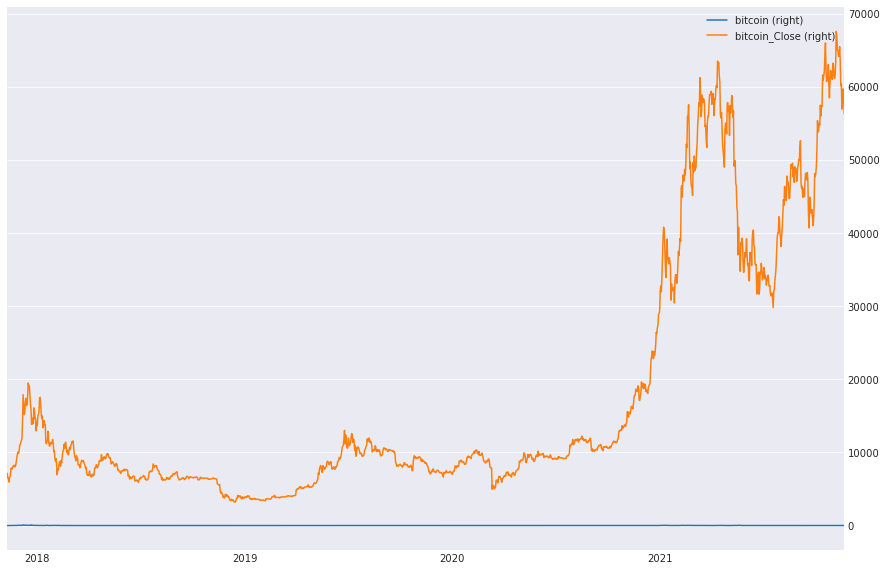

In [22]:
data[["bitcoin","bitcoin_Close"]].plot(figsize = (15,10),secondary_y=True )

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
sc.fit(data[["ethereum","ethereum_Close"]])

StandardScaler()

In [25]:
std_data = pd.DataFrame(sc.transform(data[["ethereum","ethereum_Close"]]),index = data.index, columns = ["intterest in ethereum","Close Price"])

<AxesSubplot:>

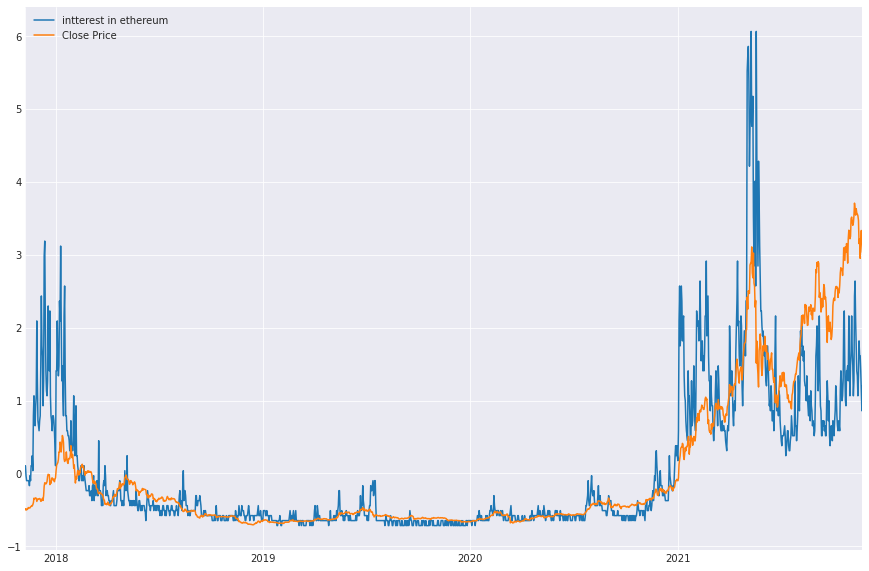

In [26]:
std_data.plot(figsize = (15,10))

In [27]:
import statsmodels.api as sm

models = dict()

for cryp in ["bitcoin","ethereum","tether"]:
    y = data['{}_Close'.format(cryp)]
    x1 = data[[cryp]]
    x = sm.add_constant(x1)
    models[cryp] = sm.OLS(y,x).fit()

C:\Users\antho\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
models["bitcoin"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bitcoin_Close   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     282.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.49e-58
Time:                        13:54:47   Log-Likelihood:                -16321.
No. Observations:                1475   AIC:                         3.265e+04
Df Residuals:                    1473   BIC:                         3.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+04    555.108     19.597      0.000    9789.406     1.2e+04
bitcoin      778.9070     46.320     16.816      0.000     688.047     869.767
==============================================================================
Omnibus:                      277.585   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.463
Skew:                           1.137   Prob(JB):                    2.61e-113
Kurtosis:                       4.806   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
models["ethereum"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ethereum_Close   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2188.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.65e-293
Time:                        13:54:47   Log-Likelihood:                -11712.
No. Observations:                1475   AIC:                         2.343e+04
Df Residuals:                    1473   BIC:                         2.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.6790     22.503      8.429      0.000     145.537     233.821
ethereum      56.7233      1.213     46.776      0.000      54.345      59.102
==============================================================================
Omnibus:                      390.533   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1924.692
Skew:                           1.155   Prob(JB):                         0.00
Kurtosis:                       8.097   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
models["tether"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tether_Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5987
Date:                Sat, 16 Apr 2022   Prob (F-statistic):              0.439
Time:                        13:54:47   Log-Likelihood:                 5366.5
No. Observations:                1475   AIC:                        -1.073e+04
Df Residuals:                    1473   BIC:                        -1.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0024      0.001   1874.899      0.000       1.001       1.003
tether     -1.634e-05   2.11e-05     -0.774      0.439   -5.78e-05    2.51e-05
==============================================================================
Omnibus:                      812.071   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31350.081
Skew:                           1.912   Prob(JB):                         0.00
Kurtosis:                      25.259   Cond. No.                         81.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
stats.pearsonr(data["tether"], data["tether_Close"])